#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

#### Loading the dataset

In [2]:
data = pd.read_csv(r"D:\ICTAK\Assignments and Case Studies\Case Study 03\Wine_clust .csv")

#### Displaying the head of the dataset

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Getting the shape of the dataset

In [4]:
data.shape

(178, 13)

#### Getting the info of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


#### Finding whether there is null values in the dataset

In [6]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

##### <font color = violet> There is no null values in the dataset.

#### Displaying the statistical summary of the dataset

In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## <font color = brown> PCA before Scaling

#### Importing pca from sklearn

In [8]:
from sklearn.decomposition import PCA

#### Reducing the data features to 2 components

In [9]:
pca = PCA(n_components = 2)
df = pca.fit_transform(data)
df = pd.DataFrame(df, columns = ['PCA1', 'PCA2'])
df.head(10)

,PCA1,PCA2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
5,703.231192,-0.332159
6,542.971581,-13.518967
7,548.401860,11.449432
8,298.036863,-8.180158
9,298.049553,-7.101543


## <font color = brown> K-Means Clustering before scaling

#### Importing KMeans from sklearn

In [10]:
from sklearn.cluster import KMeans

In [11]:
x = df.values

In [12]:
data1 = df.copy()

#### Importing silhouette score from sklearn

In [13]:
from sklearn.metrics import silhouette_score

#### Defining a function to find the optimum number of clusters using the elbow method

In [14]:
def kmeanscluster(x):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('wcss')
    plt.show()

#### Calling the kmeanscluster function before scaling

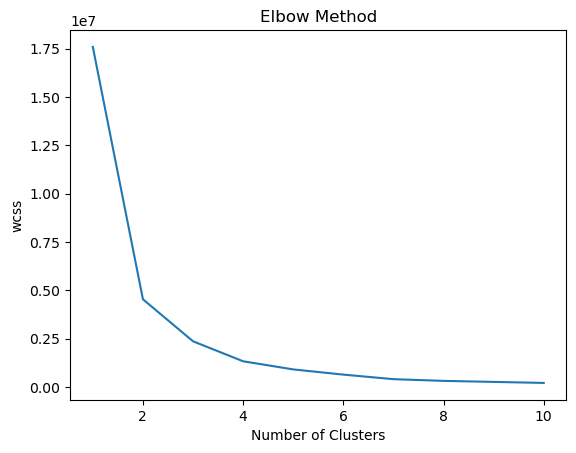

In [15]:
kmeanscluster(x)

##### <font color = violet> We can see that after n_clusters = 3, there is no signiifcant drop in the wcss value. So we can take optimum number of clusters as 3.

#### Clustering the dataset using optimum number of clusters by kmeans and plotting it

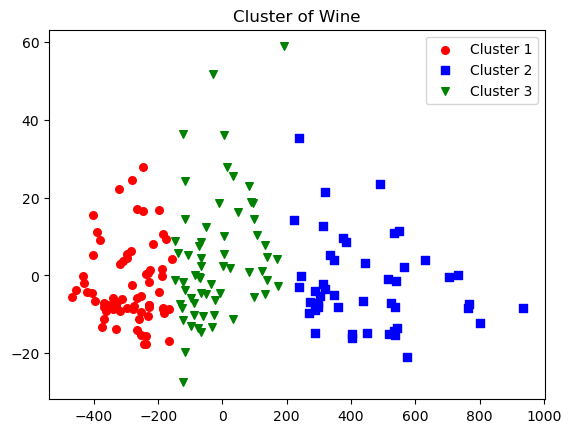

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 30, c = 'red', label = 'Cluster 1', marker = 'o')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 30, c = 'blue', label = 'Cluster 2', marker = 's')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 30, c = 'green', label = 'Cluster 3', marker = 'v')
plt.title('Cluster of Wine')
plt.legend()
plt.show()

#### Adding a column "Cluster" into the dataframe data1

In [17]:
data1['Cluster'] = kmeans.labels_
data1.head(10)

,PCA1,PCA2,Cluster
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,2
5,703.231192,-0.332159,1
6,542.971581,-13.518967,1
7,548.401860,11.449432,1
8,298.036863,-8.180158,1
9,298.049553,-7.101543,1


#### Finding Silhouette score of kmeans before scaling

In [18]:
print('Silhouette score of kmeans before scaling =', silhouette_score(x, y_kmeans))

Silhouette score of kmeans before scaling = 0.5722554756855064


## <font color = brown> Hierarchial Clustering before scaling

#### Importing hierarchy from scipy

In [19]:
import scipy.cluster.hierarchy as sch

In [20]:
data2 = df.copy()

#### Defining a function to find the optimum number of clusters using dendrogram

In [21]:
def dendrogram(x):
    dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
    plt.title('Dendrogram')
    plt.ylabel('Euclidean Distance')
    plt.show()

#### Calling the dendrogram function before scaling

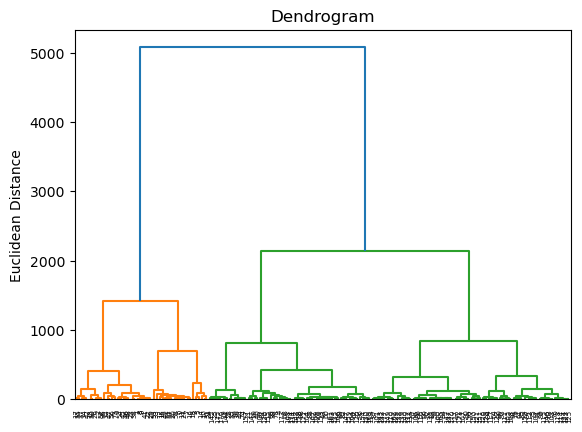

In [22]:
dendrogram(x)

##### <font color = violet> We can see that the optimum number of clusters using the dendrogram is 2.

#### Imporing AgglomerativeClustering from sklearn

In [23]:
from sklearn.cluster import AgglomerativeClustering

####  Clustering the dataset using optimum number of clusters by Agglomerative Clustering and plotting it

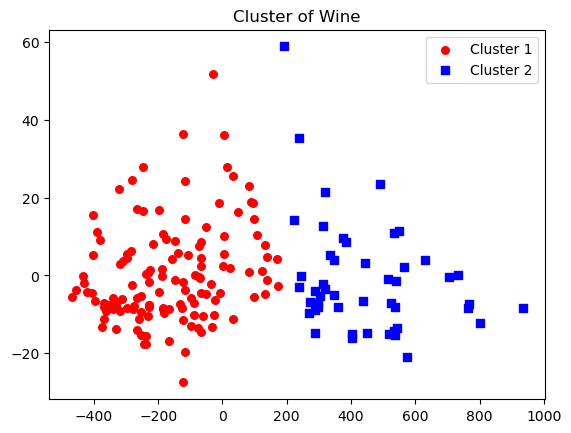

In [24]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 30, c = 'red', label = 'Cluster 1', marker = 'o')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 30, c = 'blue', label = 'Cluster 2', marker = 's')
plt.title('Cluster of Wine')
plt.legend()
plt.show()

#### Adding a column "Cluster" into the dataframe data2

In [25]:
data2['Cluster'] = hc.labels_
data2.head(10)

,PCA1,PCA2,Cluster
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,0
5,703.231192,-0.332159,1
6,542.971581,-13.518967,1
7,548.401860,11.449432,1
8,298.036863,-8.180158,1
9,298.049553,-7.101543,1


#### Finding Silhouette score of Agglomerative Clustering before scaling

In [26]:
print('Silhouette score of Agglomerative Clustering before scaling =', silhouette_score(x, y_hc))

Silhouette score of Agglomerative Clustering before scaling = 0.6590718062960336


## <font color = brown> DBSCAN Clustering before Scaling

#### Importing DBSCAN from sklearn

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
data3 = df.copy()

#### Importing NearestNeighbors from sklearn

In [29]:
from sklearn.neighbors import NearestNeighbors

#### Defining a function to compute data proximity from each other using Nearest Neighbours

In [30]:
def neighbors(x):
    neighbor = NearestNeighbors(n_neighbors = 5)
    nbrs = neighbor.fit(x)
    distances, index = nbrs.kneighbors(x)     # finding the nearest neighbours
    distances = np.sort(distances, axis = 0)  # sorting the distances
    dist = distances[:, 1]                    # taking the second column of the sorted distances
    plt.plot(dist)                            # plotting the distances
    plt.show()

#### Calling the neighbors function before scaling

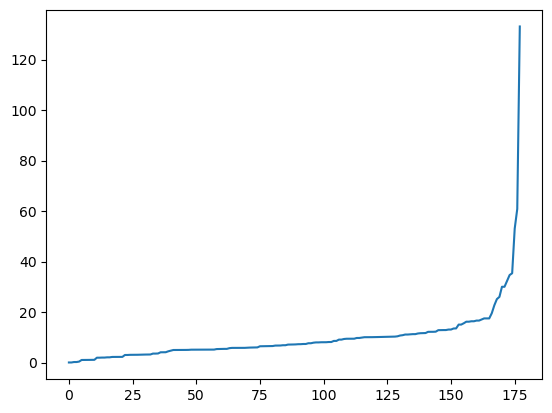

In [31]:
neighbors(x)

##### <font color = violet> From the above plot, we note the maximum curvature of the curve is about 35, and thus we picked our eps as 35.

#### Clustering the dataset using DBSCAN before scaling

In [32]:
dbscan = DBSCAN(eps = 35, min_samples = 4)
y_db = dbscan.fit_predict(x)

#### Adding a column "Cluster" into the dataframe data3

In [33]:
data3['Cluster'] = dbscan.labels_
data3.head(10)

,PCA1,PCA2,Cluster
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,-1
3,733.240139,0.192729,-1
4,-11.571428,18.489995,1
5,703.231192,-0.332159,-1
6,542.971581,-13.518967,2
7,548.401860,11.449432,2
8,298.036863,-8.180158,0
9,298.049553,-7.101543,0


#### Finding unique values in the "Cluster" column of data3

In [34]:
data3.Cluster.unique()

array([ 0, -1,  1,  2,  3], dtype=int64)

##### <font color = violet> The number of clusters using DBSCAN before scaling is 5.

#### Plotting the clusters using DBSCAN before scaling

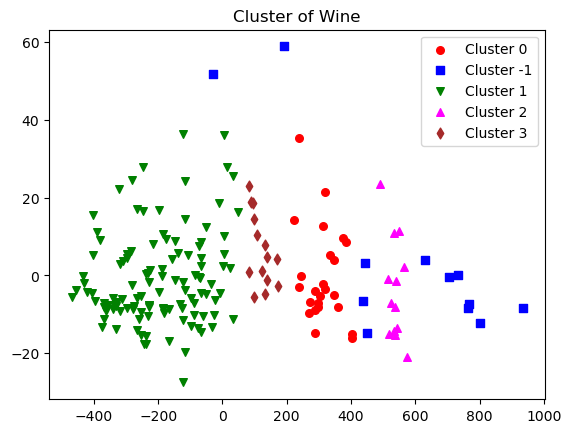

In [35]:
plt.scatter(x[y_db == 0,0], x[y_db == 0,1], s = 30, c = 'red', label = 'Cluster 0', marker = 'o')
plt.scatter(x[y_db == -1,0], x[y_db == -1,1], s = 30, c = 'blue', label = 'Cluster -1', marker = 's')
plt.scatter(x[y_db == 1,0], x[y_db == 1,1], s = 30, c = 'green', label = 'Cluster 1', marker = 'v')
plt.scatter(x[y_db == 2,0], x[y_db == 2,1], s = 30, c = 'magenta', label = 'Cluster 2', marker = '^')
plt.scatter(x[y_db == 3,0], x[y_db == 3,1], s = 30, c = 'brown', label = 'Cluster 3', marker = 'd')
plt.title('Cluster of Wine')
plt.legend()
plt.show()

####  Finding Silhouette score of DBSCAN before scaling

In [36]:
print('Silhouette score of DBSCAN before scaling =', silhouette_score(x, y_db))

Silhouette score of DBSCAN before scaling = 0.44927187629502785


# <font color = #e30b5d> Standard Scaling

#### Importing Standard Scaler from sklearn

In [37]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

#### Scaling the original dataset and coverting it into Dataframe

In [38]:
df1 = std.fit_transform(data)
df1 = pd.DataFrame(df1, columns = data.columns)
df1.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


## <font color = #ba2a27> PCA after scaling

#### Reducing the data features into 2 components

In [39]:
df2 = pca.fit_transform(df1)
df2 = pd.DataFrame(df2, columns = ['PCA1', 'PCA2'])
df2.head(10)

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
5,3.050254,-2.122401
6,2.449090,-1.174850
7,2.059437,-1.608963
8,2.510874,-0.918071
9,2.753628,-0.789438


In [40]:
x1 = df2.values

## <font color = #ba2a27> K-Means Clustering after Scaling

In [41]:
data4 = df2.copy()

#### Calling the kmeanscluster function after scaling

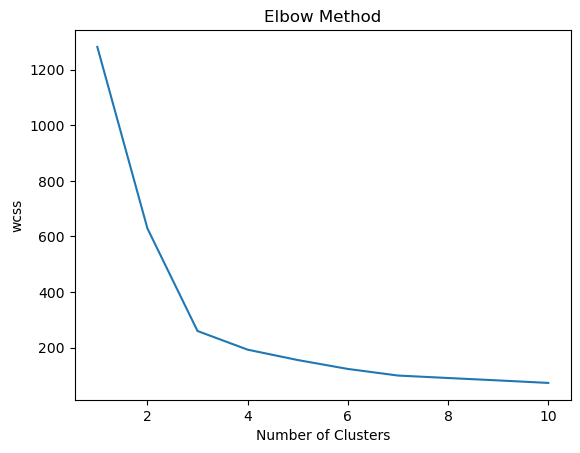

In [42]:
kmeanscluster(x1)

##### <font color = violet> We can see that after n_clusters = 3, there is no signiifcant drop in the wcss value. So we can take optimum number of clusters as 3.

#### Clustering the dataset using optimum number of clusters by kmeans and plotting it

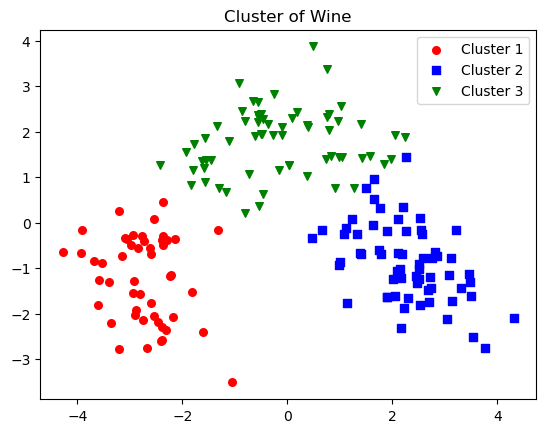

In [43]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(x1)
plt.scatter(x1[y_kmeans1 == 0,0], x1[y_kmeans1 == 0,1], s = 30, c = 'red', label = 'Cluster 1', marker = 'o')
plt.scatter(x1[y_kmeans1 == 1,0], x1[y_kmeans1 == 1,1], s = 30, c = 'blue', label = 'Cluster 2', marker = 's')
plt.scatter(x1[y_kmeans1 == 2,0], x1[y_kmeans1 == 2,1], s = 30, c = 'green', label = 'Cluster 3', marker = 'v')
plt.title('Cluster of Wine')
plt.legend()
plt.show()

#### Adding a column "Cluster" into the dataframe data4

In [44]:
data4['Cluster'] = kmeans.labels_
data4.head(10)

,PCA1,PCA2,Cluster
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
5,3.050254,-2.122401,1
6,2.449090,-1.174850,1
7,2.059437,-1.608963,1
8,2.510874,-0.918071,1
9,2.753628,-0.789438,1


#### Finding Silhouette score of kmeans after scaling

In [45]:
print('Silhouette score of kmeans after scaling =', silhouette_score(x1, y_kmeans1))

Silhouette score of kmeans after scaling = 0.5610505693103247


## <font color = #ba2a27> Hierarchial Clustering after scaling

In [46]:
data5 = df2.copy()

#### Calling the dendrogram function after scaling

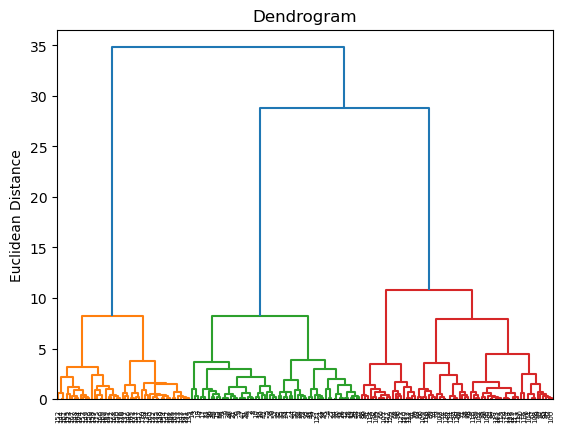

In [47]:
dendrogram(x1)

##### <font color = violet> We can see that the optimum number of clusters using the dendrogram is 3.

####  Clustering the dataset using optimum number of clusters by Agglomerative Clustering and plotting it

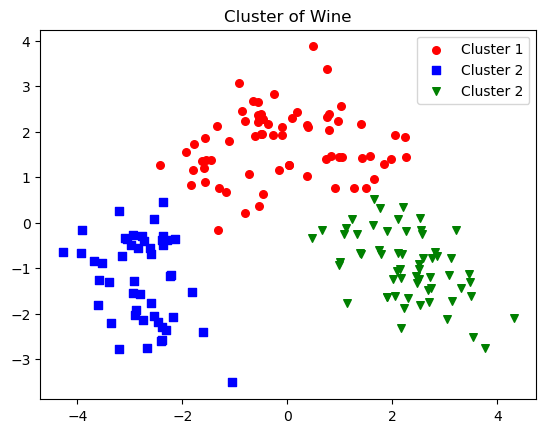

In [48]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc.fit_predict(x1)
plt.scatter(x1[y_hc1 == 0, 0], x1[y_hc1 == 0, 1], s = 30, c = 'red', label = 'Cluster 1', marker = 'o')
plt.scatter(x1[y_hc1 == 1, 0], x1[y_hc1 == 1, 1], s = 30, c = 'blue', label = 'Cluster 2', marker = 's')
plt.scatter(x1[y_hc1 == 2, 0], x1[y_hc1 == 2, 1], s = 30, c = 'green', label = 'Cluster 2', marker = 'v')
plt.title('Cluster of Wine')
plt.legend()
plt.show()

#### Adding a column "Cluster" into the dataframe data5

In [49]:
data5['Cluster'] = hc.labels_
data5.head(10)

,PCA1,PCA2,Cluster
0,3.316751,-1.443463,2
1,2.209465,0.333393,2
2,2.516740,-1.031151,2
3,3.757066,-2.756372,2
4,1.008908,-0.869831,2
5,3.050254,-2.122401,2
6,2.449090,-1.174850,2
7,2.059437,-1.608963,2
8,2.510874,-0.918071,2
9,2.753628,-0.789438,2


#### Finding Silhouette score of Agglomerative Clustering after scaling

In [50]:
print('Silhouette score of Agglomerative Clustering after scaling =', silhouette_score(x1, y_hc1))

Silhouette score of Agglomerative Clustering after scaling = 0.5590883962040384


## <font color = #ba2a27> DBSCAN Clustering after scaling

In [51]:
data6 = df.copy()

#### Calling the neighbors function after scaling

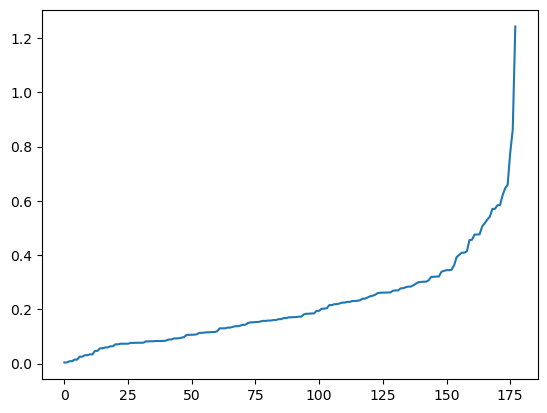

In [52]:
neighbors(x1)

##### <font color = violet> From the above plot, we note the maximum curvature of the curve is about 0.65, and thus we picked our eps as 0.65.

#### Clustering the dataset using DBSCAN after scaling

In [53]:
dbscan1 = DBSCAN(eps = 0.65, min_samples = 4)
y_db1 = dbscan1.fit_predict(x1)

#### Adding a column "Cluster" into the dataframe data6

In [54]:
data6['Cluster'] = dbscan1.labels_
data6.head(10)

,PCA1,PCA2,Cluster
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0
3,733.240139,0.192729,-1
4,-11.571428,18.489995,0
5,703.231192,-0.332159,0
6,542.971581,-13.518967,0
7,548.401860,11.449432,0
8,298.036863,-8.180158,0
9,298.049553,-7.101543,0


#### Finding unique values in the "Cluster" column of data6

In [55]:
data6.Cluster.unique()

array([ 0, -1,  1], dtype=int64)

##### <font color = violet> The number of clusters using DBSCAN after scaling is 3.

#### Plotting the clusters using DBSCAN after scaling

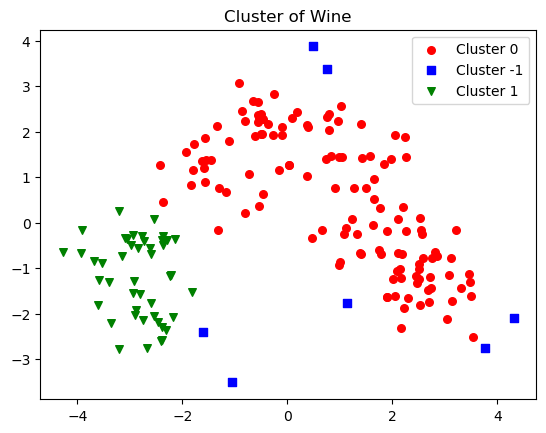

In [56]:
plt.scatter(x1[y_db1 == 0,0], x1[y_db1 == 0,1], s = 30, c = 'red', label = 'Cluster 0', marker = 'o')
plt.scatter(x1[y_db1 == -1,0], x1[y_db1 == -1,1], s = 30, c = 'blue', label = 'Cluster -1', marker = 's')
plt.scatter(x1[y_db1 == 1,0], x1[y_db1 == 1,1], s = 30, c = 'green', label = 'Cluster 1', marker = 'v')
plt.title('Cluster of Wine')
plt.legend()
plt.show()

####  Finding Silhouette score of DBSCAN after scaling

In [58]:
print('Silhouette score of DBSCAN after scaling =', silhouette_score(x1, y_db1))

Silhouette score of DBSCAN after scaling = 0.3566384836904229


### <font color = red> The Agglomerative Hierarchial Clustering before scaling has the highest silhouette score with optimum number of clusters as 2. So we can take this model.